# 0.1.0 Introduction to geospatial vector data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import geopandas as gpd 
import contextily

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.1.2 Restaurants in Paris

In [4]:
restaurants = pd.read_csv(path.data_raw_dir("working/paris_restaurants.csv"), sep=',')
print(restaurants.info())
restaurants.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    5735 non-null   object 
 1   x       5735 non-null   float64
 2   y       5735 non-null   float64
dtypes: float64(2), object(1)
memory usage: 134.5+ KB
None


,type,x,y
0,European restuarant,259641.691646,6.251867e+06
1,Traditional French restaurant,259572.339603,6.252030e+06
2,Traditional French restaurant,259657.276374,6.252143e+06
3,Indian / Middle Eastern restaurant,259684.438330,6.252203e+06
4,Traditional French restaurant,259597.943086,6.252230e+06


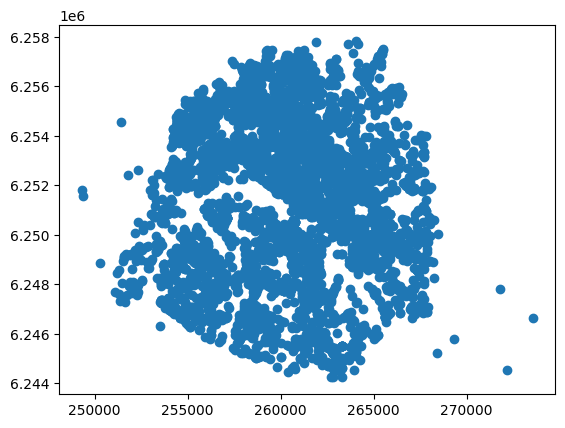

In [5]:
# Make a plot of all points
fig, ax = plt.subplots()
ax.plot(restaurants['x'], restaurants['y'], 'o')
plt.show()

## 0.1.3 Adding a background map

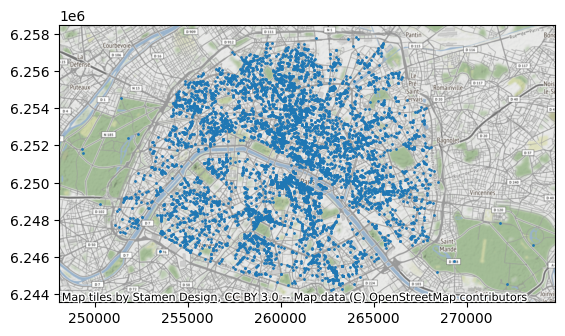

In [6]:
# A figure of all restaurants with background
fig, ax = plt.subplots()
ax.plot(restaurants['x'], restaurants['y'], 'o', markersize=1)
contextily.add_basemap(ax)
plt.show()

## 0.1.5 Explore the Paris districts (I)

In [9]:
districts = gpd.read_file(path.data_raw_dir("working/paris_districts_utm.geojson"))
districts.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


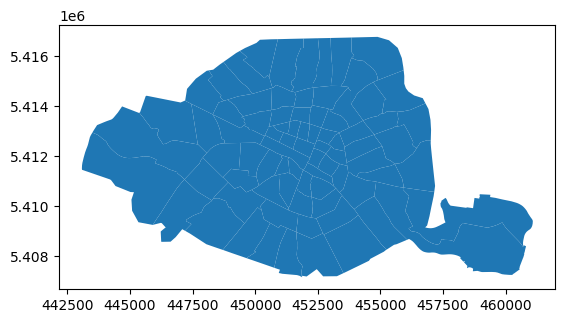

In [10]:
# Make a quick visualization of the districts
districts.plot()
plt.show()

## 0.1.6 Explore the Paris districts (II)

In [11]:
# Check what kind of object districts is
print(type(districts))

# Check the type of the geometry attribute
print(type(districts['geometry']))

# Inspect the first rows of the geometry
print(districts['geometry'].head(5))

# Inspect the area of the districts
print(districts['geometry'].area)

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
0    POLYGON ((451922.133 5411438.484, 451922.080 5...
1    POLYGON ((452278.419 5412160.893, 452192.407 5...
2    POLYGON ((451553.806 5412340.522, 451528.058 5...
3    POLYGON ((451004.908 5412654.095, 450960.640 5...
4    POLYGON ((451328.752 5412991.278, 451294.721 5...
Name: geometry, dtype: geometry
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
5     2.434179e+05
6     2.779910e+05
7     2.812949e+05
8     3.179144e+05
9     2.716030e+05
10    3.675315e+05
11    2.132014e+05
12    3.128737e+05
13    4.218047e+05
14    4.870094e+05
15    3.780538e+05
16    6.038437e+05
17    7.979828e+05
18    7.032747e+05
19    4.329736e+05
20    2.932068e+05
21    7.157800e+05
22    8.608673e+05
23    2.821319e+05
24    8.261271e+05
25    1.073169e+06
26    8.074561e+05
27    1.381170e+06
28    1.139641e+06
29    7.961535e+05
30    7.603116e+05
31    1.181811e+06

## 0.1.7 The Paris restaurants as a GeoDataFrame

In [12]:
# Read the restaurants csv file into a DataFrame
df = pd.read_csv(path.data_raw_dir("working/paris_restaurants.csv"))

# Convert it to a GeoDataFrame
restaurants = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))

# Inspect the first rows of the restaurants GeoDataFrame
print(restaurants.head)

<bound method NDFrame.head of                                        type              x             y  \
0                       European restuarant  259641.691646  6.251867e+06   
1             Traditional French restaurant  259572.339603  6.252030e+06   
2             Traditional French restaurant  259657.276374  6.252143e+06   
3        Indian / Middle Eastern restaurant  259684.438330  6.252203e+06   
4             Traditional French restaurant  259597.943086  6.252230e+06   
5                       European restuarant  259522.023193  6.252189e+06   
6                          Asian restaurant  259718.836053  6.252426e+06   
7                          Asian restaurant  259613.861773  6.252386e+06   
8                          Asian restaurant  259257.305444  6.252073e+06   
9                          Asian restaurant  259227.026543  6.252110e+06   
10            Traditional French restaurant  259037.894728  6.252204e+06   
11            Traditional French restaurant  258766.052531

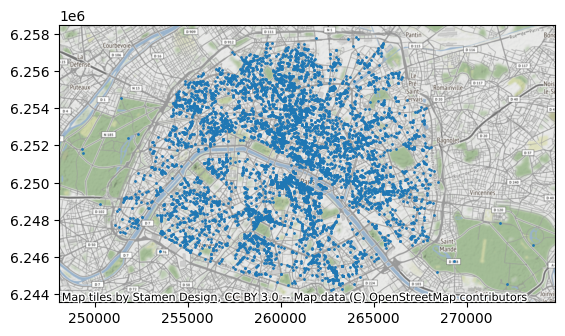

In [13]:
# Make a plot of the restaurants
ax = restaurants.plot(markersize=1)
contextily.add_basemap(ax)
plt.show()

## 0.1.9 Visualizing the population density

In [14]:
# Inspect the first rows of the districts dataset
print(districts.head())

# Inspect the area of the districts
print(districts.geometry.area)

# Add a population density column
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

   id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   
1   2                  Halles        8984   
2   3            Palais-Royal        3195   
3   4           Place-Vendôme        3044   
4   5                 Gaillon        1345   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...  
1  POLYGON ((452278.419 5412160.893, 452192.407 5...  
2  POLYGON ((451553.806 5412340.522, 451528.058 5...  
3  POLYGON ((451004.908 5412654.095, 450960.640 5...  
4  POLYGON ((451328.752 5412991.278, 451294.721 5...  
0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
5     2.434179e+05
6     2.779910e+05
7     2.812949e+05
8     3.179144e+05
9     2.716030e+05
10    3.675315e+05
11    2.132014e+05
12    3.128737e+05
13    4.218047e+05
14    4.870094e+05
15    3.780538e+05
16    6.038437e+05
17    7.979828e+05
18    7.032747e+05
19    4.329736e+05
20    2.932068e+05


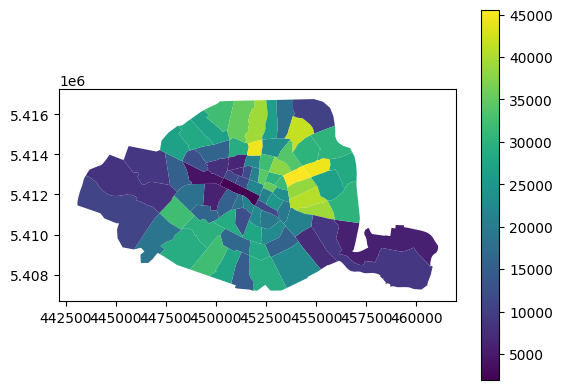

In [15]:
# Make a plot of the districts colored by the population density
districts.plot(column='population_density', legend=True)
plt.show()

## 0.1.10 Using pandas functionality: groupby

In [23]:
restaurants = gpd.read_file(path.data_processed_dir("working/paris_restaurants.geojson"))
restaurants.head()

,type,geometry
0,European restuarant,POINT (259641.69165 6251867.06262)
1,Traditional French restaurant,POINT (259572.33960 6252029.68316)
2,Traditional French restaurant,POINT (259657.27637 6252143.40095)
3,Indian / Middle Eastern restaurant,POINT (259684.43833 6252203.13724)
4,Traditional French restaurant,POINT (259597.94309 6252230.04409)


In [25]:
# Calculate the number of restaurants of each type
type_counts = restaurants.groupby('type').size()

# Print the result
print(type_counts)

type
African restaurant                        138
Asian restaurant                         1642
Caribbean restaurant                       27
Central and South American restuarant      97
European restuarant                      1178
Indian / Middle Eastern restaurant        394
Maghrebian restaurant                     207
Other world restaurant                    107
Traditional French restaurant            1945
dtype: int64


## 0.1.11 Plotting multiple layers

In [29]:
# Take a subset of the African restaurants
african_restaurants = restaurants[restaurants['type'] == 'African restaurant']
african_restaurants.head()

,type,geometry
191,African restaurant,POINT (262927.06378 6256353.38740)
194,African restaurant,POINT (263086.91857 6256656.45449)
273,African restaurant,POINT (262051.42466 6255859.02191)
274,African restaurant,POINT (262171.87235 6256197.62529)
275,African restaurant,POINT (262061.44342 6256270.08818)


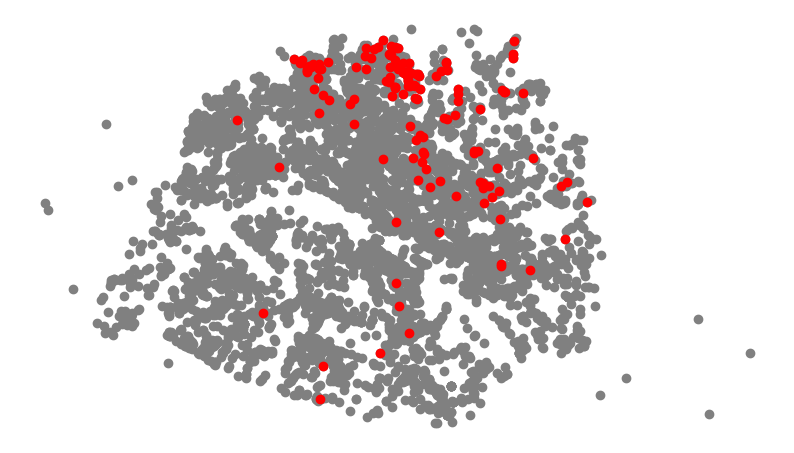

In [35]:
# Make a multi-layered plot
fig, ax = plt.subplots(figsize=(10, 10))
restaurants.plot(ax=ax, color='grey')
african_restaurants.plot(ax=ax, color='red', aspect=1)
# Remove the box, ticks and labels
ax.set_axis_off()
plt.show()

In [ ]:
print('ok_')